In [152]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np 
import matplotlib.pyplot as plt
import random 

In [153]:
data = load_diabetes()

In [154]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [155]:
X = data.data
y = data.target

In [156]:
X.shape , y.shape

((442, 10), (442,))

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train,X_test,y_train ,y_test = train_test_split(X,y,random_state=22)

In [159]:
X_train.shape,y_train.shape , X_test.shape,y_test.shape

((331, 10), (331,), (111, 10), (111,))

In [160]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [161]:
lr_predict = lr.predict(X_test)

In [162]:
r2_score(y_test,lr_predict)

0.4805023753109876

In [163]:
rr = Ridge(alpha=0.000001)
rr.fit(X_train,y_train)
rr_predict = rr.predict(X_test)
r2_score(y_test,rr_predict)

0.48050116611140936

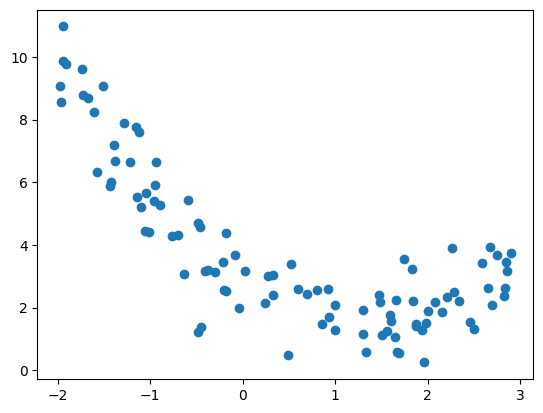

In [165]:
# Create non-linear synthetic data (for visualization)
m = 100
x1 = 5 * np.random.rand(m, 1) - 2          # Input: Random numbers in range [-2, 3]
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)  # Output: Non-linear function with noise

# Visualize the data
plt.scatter(x1, x2)
plt.show()




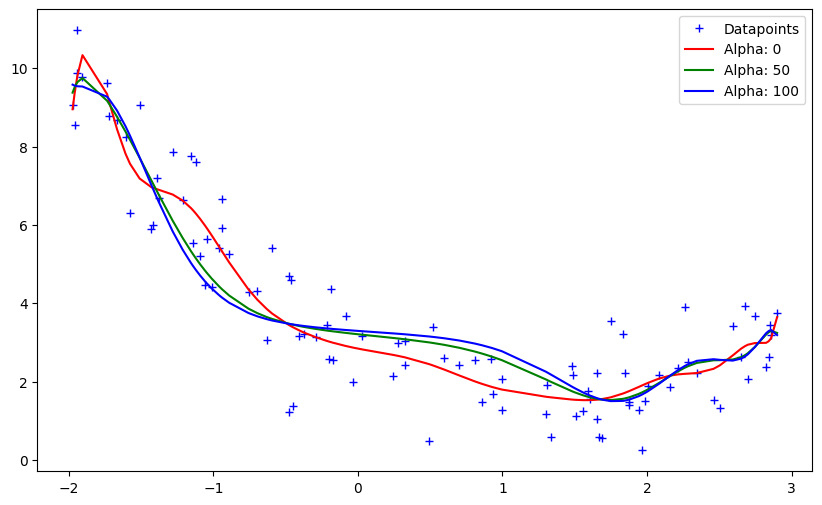

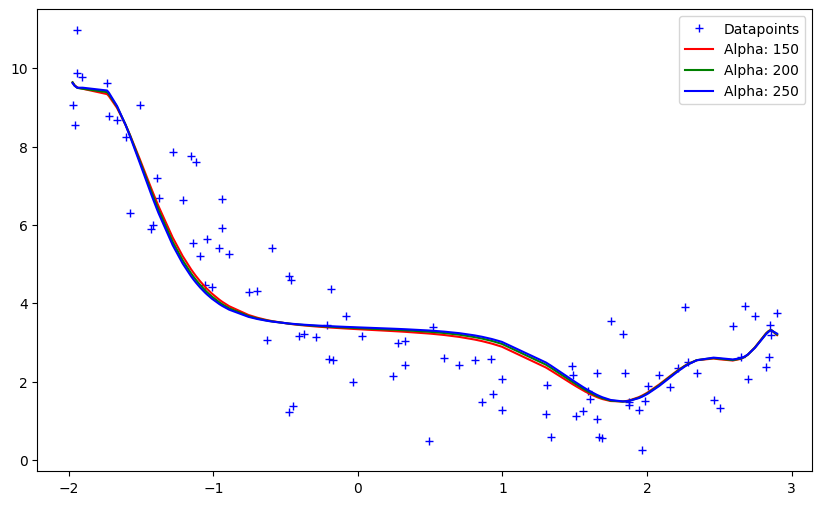

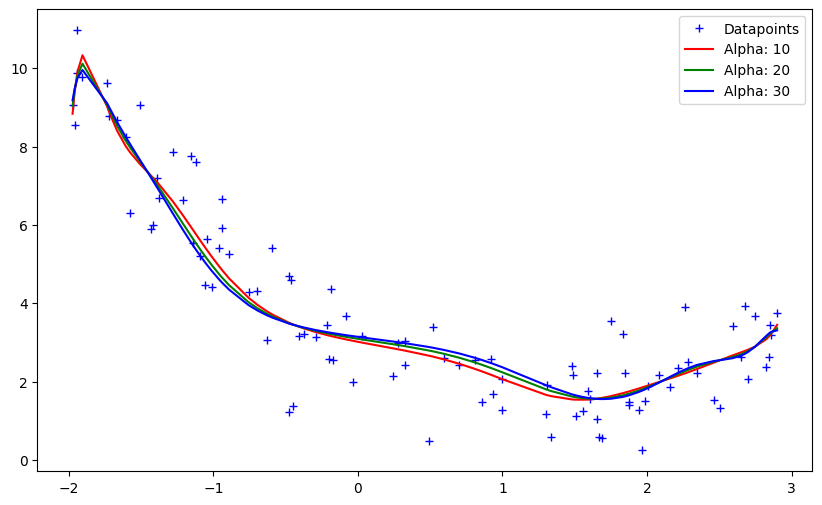

In [168]:
# Define a function that builds a polynomial Ridge regression model and returns predictions
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),  # Create polynomial features up to degree 16
        ('ridge', Ridge(alpha=alpha))                   # Use Ridge regression
    ])
    model.fit(x1, x2)                                   # Fit the model to the data
    return model.predict(x1)                            # Return predictions

# Try different values of alpha (regularization strength)
alphas = [0, 50, 100]   # No regularization to strong regularization
cs = ['r', 'g', 'b']    # Colors for each curve

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

# Plot prediction curves for each alpha
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

# Try different values of alpha (regularization strength)
alphas = [150, 200, 250]   # No regularization to strong regularization
cs = ['r', 'g', 'b']    # Colors for each curve

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

# Plot prediction curves for each alpha
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()
# Try different values of alpha (regularization strength)
alphas = [ 10, 20,30,]   # No regularization to strong regularization
cs = ['r', 'g', 'b']    # Colors for each curve

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

# Plot prediction curves for each alpha
for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()